<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [8]:
docs = yelp.text.values.tolist()
docs[0]

'BEWARE!!! FAKE, FAKE, FAKE....We also own a small business in Los Alamitos, CA and received what looked like a legitimate bill for $70 with an account number and all.  I called the phone number listed (866) 273-7934.  The wait time on hold said 20 minutes and to leave a message.  I could not get a live person on the phone no matter what number I selected.  I left a very FIRM message that I would be contacting the BBB and my attorney regarding their company trying to scam businesses. This has to be illegal!!!!!'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [11]:
import gensim
from gensim.utils import simple_preprocess

def tokenize(doc):
    for doc in docs:
        yield(simple_preprocess(str(doc), deacc=True))

In [12]:
data_words = list(tokenize(doc))
data_words[0][:10]

['beware',
 'fake',
 'fake',
 'fake',
 'we',
 'also',
 'own',
 'small',
 'business',
 'in']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda doc: doc, lowercase=False)

dtm = tfidf.fit_transform(data_words)
df = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
df.head()

/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,aa,aaa,aaaahhhs,aaasssk,aabs,aamco,aand,aaron,aback,abandoned,...,覺得店家很用心製作,誓約書にサイン,誰も乗車しなくても,豆腐花,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語て指導かあります,食へ物はうまい,餐後點了甜點
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [20]:
fake_review = ["Great food. The octopus was delicious. Next time I will try the sea cucumber!"]

In [21]:
new = tfidf.transform(fake_review)

nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[2197, 8258, 1242, 7488,  358, 2397, 5950, 7181, 2817, 6455]]))

In [25]:
print(docs[2197], docs[8258], docs[1242], docs[7488],  docs[358], docs[2397], docs[5950], docs[7181], docs[2817], docs[6455])

Guu originated from our friends on the West coast of Canada, in British Columbia. With their bountiful fresh fish and lively atmosphere, they were able to create an izakaya so popular, that there are now two locations in Toronto. The name of the restaurant is supposed to resemble the sounds of a rumbling stomach, which is definitely how I recommend you should feel going into Guu. I've actually been here a couple times now, but never actually got around to posting up a review. After multiple visits, I've come to gather lots of opinions, so hopefully you can bear through this long long post! 

After probably a one our line-up (this place doesn't take reservations), you will enter the small, dimly lit Guu restaurant, and be greeted by the entire house of servers yelling at you. Really. It's not a shocking terrifying yell, but a rather warm friendly one. Presumably they are saying "welcome" in Japanese. Likewise, when you leave, or order a birthday dessert (which is actually what we did fo

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

vect = TfidfVectorizer(stop_words='english', tokenizer=lambda doc: doc, lowercase=False)
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(data_words, yelp['stars'])
y_pred = grid_search.predict(fake_review)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.5min finished
/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [29]:
y_pred

array([5])

Makes sense, this would be a 5 star review.

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [31]:
from gensim import corpora

id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

In [32]:
from gensim.models.ldamulticore import LdaMulticore

# build LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=10, 
                         random_state=42,
                         passes=10,
                         workers=4)

In [56]:
# take a look at keywords in the 10 topics
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
print(topics)

['the and was to of it for with in but', 'the and is to of it you in this they', 'de la et le un les pour est en tres', 'the and was it to of is in we with', 'our and the vinny gabe killer server ever on within', 'and the to great we very is with for my', 'the we and to was of for it were our', 'to the and of my it was you for in', 'the to and in of was it is they for', 'and to the my was me for that it they']


In [59]:
pip install wordcloud

     |████████████████████████████████| 163kB 1.9MB/s 
     |████████████████████████████████| 3.9MB 3.1MB/s 
Note: you may need to restart the kernel to use updated packages.


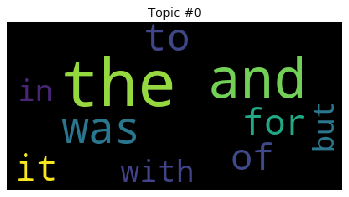

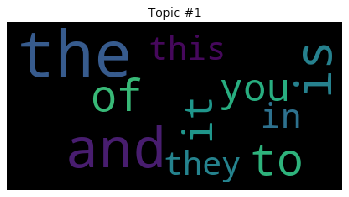

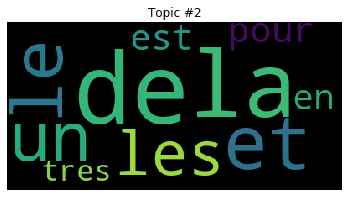

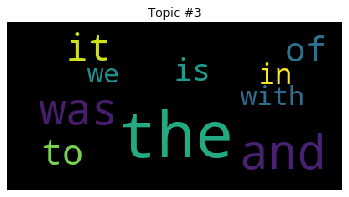

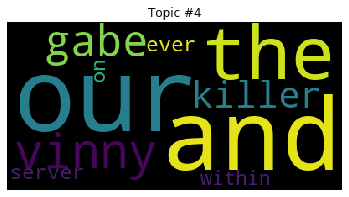

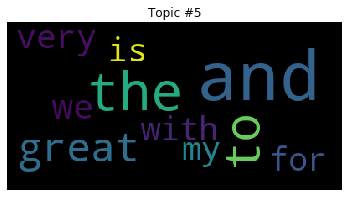

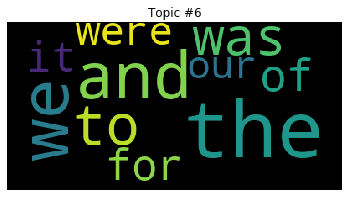

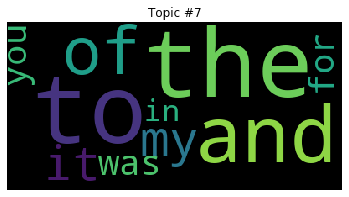

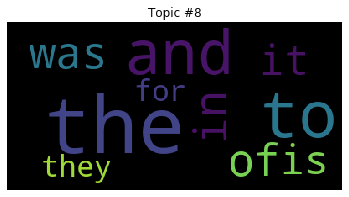

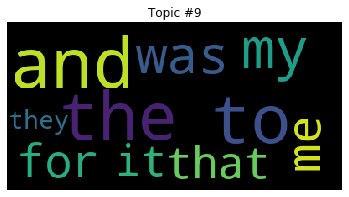

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)